# Necessary Function

In [ ]:
#!pip install gensim
#!pip install nltk
#!pip install textblob
#!pip install emoji
#!pip install wordcloud

In [1]:
import pandas as pd
# nltk
import nltk
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
import nltk.corpus
nltk.download('stopwords')
from nltk.stem.porter import *

# feature extraction
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer

from textblob import TextBlob

# gensim
import gensim
from gensim import corpora, models, similarities, matutils

# logging for gensim (set to INFO)
import logging
logging.basicConfig(format='%(asctime)s : %(levelname)s : %(message)s', level=logging.INFO)


from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import MultinomialNB


import sklearn.metrics as mt
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_recall_fscore_support as score
from sklearn.metrics import roc_curve
from sklearn.metrics import auc
from sklearn.metrics import roc_auc_score
from sklearn.metrics import precision_score, recall_score, accuracy_score, roc_auc_score
from sklearn.metrics import confusion_matrix

from sklearn.preprocessing import StandardScaler, MinMaxScaler,MaxAbsScaler
import string
from pathlib import Path
import numpy as np
import matplotlib.pyplot as plt

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\attawut\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.


In [2]:
import emoji
import re

def strip_emoji(text):

    print(emoji.emoji_count(text))

    new_text = re.sub(emoji.get_emoji_regexp(), r"", text)

    return new_text

In [4]:
df = pd.read_csv("tripadvisor_Restaurant_ENG_combined17072022.csv") #Choose Data

In [5]:
df

Date  Rating                                              Title  \
0       9-Oct-19      40                                     Nice resturant   
1      24-Oct-17      50                                            Clean!!   
2      30-Jun-17      40                    IN THE MIDDLE OF THE NIGHT LIFE   
3      20-Apr-17      30                                                 OK   
4       7-Dec-16      30                             Food good. Poor staff.   
...          ...     ...                                                ...   
26503   8-Jul-18      50  Reasonably priced, delicious, environmentally ...   
26504  23-Apr-18      50                 Most amazing vegan food i ever ate   
26505   2-Apr-18      30                               Enjoyable Experience   
26506   5-Jan-18      50                         Excellent Food in Pattaya!   
26507   3-Jan-18      50   Excellent food, very friendly people. Hidden gem   

                                                  Review  \
0      Good taste all food nice staff and very frendl...   
1      Not so busy new system, go to counter order yo...   
2      Have your meal and watch the world go by, A dr...   
3      The restaurant is in center of PATTAYA ( SOI B...   
4      Although food was good standard, the staff wer...   
...                                                  ...   
26503  We come here for vegan food all the time and w...   
26504  This was incredible delicious! Not to mention ...   
26505  Went for the first time to a 100% Vegan Restau...   
26506  New and first 100% vegan restaurant in Pattaya...   
26507  Happy and honoured to be the first reviewer of...   

                           Hotel_Name          X          Y  
0                 18 COINS RESTAURANT        NaN        NaN  
1                 18 COINS RESTAURANT        NaN        NaN  
2                 18 COINS RESTAURANT        NaN        NaN  
3                 18 COINS RESTAURANT        NaN        NaN  
4                 18 COINS RESTAURANT        NaN        NaN  
...                               ...        ...        ...  
26503  ํYES VEGAN BED AND VEGAN FOODS  12.909987  100.86676  
26504  ํYES VEGAN BED AND VEGAN FOODS  12.909987  100.86676  
26505  ํYES VEGAN BED AND VEGAN FOODS  12.909987  100.86676  
26506  ํYES VEGAN BED AND VEGAN FOODS  12.909987  100.86676  
26507  ํYES VEGAN BED AND VEGAN FOODS  12.909987  100.86676  

[26508 rows x 7 columns]

In [6]:
df.describe()

Rating             X             Y
count  26508.000000  26134.000000  26134.000000
mean      41.393919     12.923623    100.882289
std       11.279476      0.059064      0.027100
min       10.000000     12.760505     99.916199
25%       40.000000     12.915426    100.872513
50%       50.000000     12.929111    100.882522
75%       50.000000     12.934953    100.886528
max       50.000000     16.384226    102.824860

In [7]:
# Number of missing values in the dataset
df.isna().sum()

Date            0
Rating          0
Title           0
Review          0
Hotel_Name      0
X             374
Y             374
dtype: int64

In [8]:
df.Rating.value_counts()

50    13341
40     7684
30     2783
10     1463
20     1237
Name: Rating, dtype: int64

# Clean Data

In [9]:
def remove_url(txt):
    url = re.compile(r'https?://\S+|www\.\S+')
    return url.sub(r'',txt)

def remove_html(txt):
    html=re.compile(r'<.*?>')
    return html.sub(r'',txt)

# U+1F970
def remove_emoji(txt):
    emoji_pattern = re.compile("["
                           u"\U0001F600-\U0001F64F"  # emoticons
                           u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                           u"\U0001F680-\U0001F6FF"  # transport & map symbols
                           u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                           u"\U00002702-\U000027B0"
                           u"\U000024C2-\U0001F251"
                           "]+", flags=re.UNICODE)
    return emoji_pattern.sub(r'', txt)
def remove(emoji):
    em = re.compile(r"🥰")
    return em.sub(r"",emoji)
def remove_blank_space(text):
    return re.sub("\s\s+" , " ", text)
def remove_blank2(text):
    text = text.strip()
    return text
def remove_all(ReviewText):
    ReviewText = ReviewText.replace("(<br/>)", "")
    ReviewText = ReviewText.replace('(<a).*(>).*(</a>)', '')
    ReviewText = ReviewText.replace('(&amp)', '')
    ReviewText = ReviewText.replace('(&gt)', '')
    ReviewText = ReviewText.replace('(&lt)', '')
    ReviewText = ReviewText.replace('(\xa0)', ' ') 
    ReviewText = ReviewText.replace(r'http[s]?://(?:[a-z]|[0-9]|[$-_@.&amp;+]|[!*\(\),]|(?:%[0-9a-f][0-9a-f]))+', ' ') 
    return ReviewText

from wordcloud import STOPWORDS
import nltk
from nltk.corpus import stopwords
nltk.download("stopwords")

s_words= list(stopwords.words('english'))
stop_words = list(STOPWORDS)+ ["what", "us", "this","well","there","much","us","and","you're","in","where","when","just","how","is","ha","re","are"
                              "hi","aren't", 'couldn','could','couldnt',"couldn't",'did','had','have','must','does','should','was',"it's"
                               "didn't", "doesn't", "don't", "hadn't", "hasn't", "haven't", "isn't", 'let', 'll',"may",'were','is','has','must',
                               'mustn', 'rt', 'shan', 'shouldn', 'wasn', 'weren', 'won', 'wouldn','realli','now','got','man','people','a',
                               'becaus','caus',"one","im","guy","someone","two","nearby","i","he's","she's","we","it","they","wouldn’t","i've",
                               'aren', 'didn', 'doesn', 'don', 'hadn', 'hasn', 'haven', 'isn', 'sdidn', 've',"will","restaurant"]



def remove_stopwords(txt):
    
    sentence = []
    s = ""
    for word in txt.split():    
        if(word not in stop_words):      
            sentence.append(word)
            s = ' '.join(sentence)
    return s

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\attawut\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [10]:
df.Review = df.Review.apply(remove_url) #ใช้ method เลือก column ที่เก็บข้อมูลรีวิว
df.Review = df.Review.apply(remove_html) #ใช้ method เลือก column ที่เก็บข้อมูลรีวิว
df.Review = df.Review.apply(remove_emoji) #ใช้ method เลือก column ที่เก็บข้อมูลรีวิว
df.Review = df.Review.apply(remove) #ใช้ method เลือก column ที่เก็บข้อมูลรีวิว
df.Review = df.Review.apply(remove_blank_space) #ใช้ method เลือก column ที่เก็บข้อมูลรีวิว
df.Review = df.Review.apply(remove_blank2) #ใช้ method เลือก column ที่เก็บข้อมูลรีวิว
df.Review = df.Review.apply(remove_all) #ใช้ method เลือก column ที่เก็บข้อมูลรีวิว
df.Review = df.Review.map(remove_stopwords) #ใช้ method เลือก column ที่เก็บข้อมูลรีวิว
df.Review

0        Good taste food nice staff frendly big verity ...
1        Not busy new system, go counter order meal pay...
2        Have meal watch world go by, A drink food comf...
3        The center PATTAYA ( SOI BUAKHO) serve dish fi...
4        Although food good standard, staff miserable m...
                               ...                        
26503    We come vegan food time never disappointed. We...
26504    This incredible delicious! Not mention great s...
26505    Went first time 100% Vegan Restaurant. Certain...
26506    New first 100% vegan Pattaya. Upon first visit...
26507    Happy honoured first reviewer lovely little ve...
Name: Review, Length: 26508, dtype: object

In [11]:
df

Date  Rating                                              Title  \
0       9-Oct-19      40                                     Nice resturant   
1      24-Oct-17      50                                            Clean!!   
2      30-Jun-17      40                    IN THE MIDDLE OF THE NIGHT LIFE   
3      20-Apr-17      30                                                 OK   
4       7-Dec-16      30                             Food good. Poor staff.   
...          ...     ...                                                ...   
26503   8-Jul-18      50  Reasonably priced, delicious, environmentally ...   
26504  23-Apr-18      50                 Most amazing vegan food i ever ate   
26505   2-Apr-18      30                               Enjoyable Experience   
26506   5-Jan-18      50                         Excellent Food in Pattaya!   
26507   3-Jan-18      50   Excellent food, very friendly people. Hidden gem   

                                                  Review  \
0      Good taste food nice staff frendly big verity ...   
1      Not busy new system, go counter order meal pay...   
2      Have meal watch world go by, A drink food comf...   
3      The center PATTAYA ( SOI BUAKHO) serve dish fi...   
4      Although food good standard, staff miserable m...   
...                                                  ...   
26503  We come vegan food time never disappointed. We...   
26504  This incredible delicious! Not mention great s...   
26505  Went first time 100% Vegan Restaurant. Certain...   
26506  New first 100% vegan Pattaya. Upon first visit...   
26507  Happy honoured first reviewer lovely little ve...   

                           Hotel_Name          X          Y  
0                 18 COINS RESTAURANT        NaN        NaN  
1                 18 COINS RESTAURANT        NaN        NaN  
2                 18 COINS RESTAURANT        NaN        NaN  
3                 18 COINS RESTAURANT        NaN        NaN  
4                 18 COINS RESTAURANT        NaN        NaN  
...                               ...        ...        ...  
26503  ํYES VEGAN BED AND VEGAN FOODS  12.909987  100.86676  
26504  ํYES VEGAN BED AND VEGAN FOODS  12.909987  100.86676  
26505  ํYES VEGAN BED AND VEGAN FOODS  12.909987  100.86676  
26506  ํYES VEGAN BED AND VEGAN FOODS  12.909987  100.86676  
26507  ํYES VEGAN BED AND VEGAN FOODS  12.909987  100.86676  

[26508 rows x 7 columns]

In [12]:
sentiment_data = df[['Rating','Review','Hotel_Name']]

In [13]:
sentiment_data.values

array([[40,
        'Good taste food nice staff frendly big verity food dishes.nice clean restaurant.',
        '18 COINS RESTAURANT'],
       [50,
        'Not busy new system, go counter order meal pay sit bring. Kinda informal. Good western menu, burgers fries.',
        '18 COINS RESTAURANT'],
       [40,
        'Have meal watch world go by, A drink food comfortable surroundings menu many choices satisfy anybody.',
        '18 COINS RESTAURANT'],
       ...,
       [30,
        'Went first time 100% Vegan Restaurant. Certainly pleasant. The actual building decor done. Difficult critique F B due inexperience I enjoyed evening trying new tastes textures, certainly worth go, appeal.',
        'ํYES VEGAN BED AND VEGAN FOODS'],
       [50,
        'New first 100% vegan Pattaya. Upon first visit I pleasantly greeted welcomed owners Khun Paul, greeted warm smile made feel home. The still quite new regularly adding new items menu. The presentation taste food good! It asian-fusion cuisine

In [14]:
sdata = sentiment_data.values    # Gives a numpy array
count = len(sdata)
all_data = []

for i in range(count):
    rating = sdata[i, 0]
    hotel_name = sdata[i, 2]
    reviews = sdata[i, 1].split('], [')[0]     # Splitting the reviews and date strings from a single list and considering only the reviews
    reviews = reviews.replace("[[", "")
    reviews = reviews.replace("'", "")
    reviews = reviews.replace('"', '')
    reviews = reviews.split(',')
    print(reviews)
    for review in reviews:
        all_data.append([review, rating, hotel_name])

['Good taste food nice staff frendly big verity food dishes.nice clean restaurant.']
['Not busy new system', ' go counter order meal pay sit bring. Kinda informal. Good western menu', ' burgers fries.']
['Have meal watch world go by', ' A drink food comfortable surroundings menu many choices satisfy anybody.']
['The center PATTAYA ( SOI BUAKHO) serve dish fixed price . The food good . Its A place quick complicated lunch']
['Although food good standard', ' staff miserable met', ' resulted tip left. This leave tip. A tip earned', ' expected.']
['This location strictly hotel time. Previously', ' excellent restaurants stopped service']
['It clean location kinda sparse', ' nothing past', ' many tourists dining', ' limited menu. Im giving another chance.']
['I visited Pattaya end July', ' visted place numerous occasions', ' quality food excellent service good. Looking good value', ' check place out.']
['You choose 4 item breakfast bigger according taste appetite. One small cup Coffee served 

In [16]:
sent_data = pd.DataFrame(all_data, columns = ['Review', 'Rating','Hotel_Name'])

In [17]:
sent_data

Review  Rating  \
0      Good taste food nice staff frendly big verity ...      40   
1                                    Not busy new system      50   
2       go counter order meal pay sit bring. Kinda in...      50   
3                                         burgers fries.      50   
4                            Have meal watch world go by      40   
...                                                  ...     ...   
79229   along staff. Looking forward development plac...      50   
79230  Happy honoured first reviewer lovely little ve...      50   
79231   already great start. The menu Asian-fusion br...      50   
79232   address listed TripAdvisor correct one. All s...      50   
79233   smiley positive interior cozy (special kudos ...      50   

                           Hotel_Name  
0                 18 COINS RESTAURANT  
1                 18 COINS RESTAURANT  
2                 18 COINS RESTAURANT  
3                 18 COINS RESTAURANT  
4                 18 COINS RESTAURANT  
...                               ...  
79229  ํYES VEGAN BED AND VEGAN FOODS  
79230  ํYES VEGAN BED AND VEGAN FOODS  
79231  ํYES VEGAN BED AND VEGAN FOODS  
79232  ํYES VEGAN BED AND VEGAN FOODS  
79233  ํYES VEGAN BED AND VEGAN FOODS  

[79234 rows x 3 columns]

In [18]:
# Tokenization
# Splitting sentences into list of individual words  
tokenized_data = sent_data['Review'].apply(lambda x : x.lower().split())    
tokenized_data

0        [good, taste, food, nice, staff, frendly, big,...
1                                 [not, busy, new, system]
2        [go, counter, order, meal, pay, sit, bring., k...
3                                        [burgers, fries.]
4                       [have, meal, watch, world, go, by]
                               ...                        
79229    [along, staff., looking, forward, development,...
79230    [happy, honoured, first, reviewer, lovely, lit...
79231    [already, great, start., the, menu, asian-fusi...
79232    [address, listed, tripadvisor, correct, one., ...
79233    [smiley, positive, interior, cozy, (special, k...
Name: Review, Length: 79234, dtype: object

In [19]:
# Stemming
# Reducing a word to its stem word
stemmer = PorterStemmer()
stem_data = tokenized_data.apply(lambda x: [stemmer.stem(i) for i in x])  
stem_data

0        [good, tast, food, nice, staff, frendli, big, ...
1                                 [not, busi, new, system]
2        [go, counter, order, meal, pay, sit, bring., k...
3                                         [burger, fries.]
4                       [have, meal, watch, world, go, by]
                               ...                        
79229    [along, staff., look, forward, develop, place,...
79230    [happi, honour, first, review, love, littl, ve...
79231    [alreadi, great, start., the, menu, asian-fus,...
79232    [address, list, tripadvisor, correct, one., al...
79233    [smiley, posit, interior, cozi, (special, kudo...
Name: Review, Length: 79234, dtype: object

In [20]:
# Joining the stemmed words to reframe sentences
stemmed_data = []
for i in range(len(stem_data)):
    stemmed_data.append(' '.join(stem_data[i]))    

stemmed_data

['good tast food nice staff frendli big veriti food dishes.nic clean restaurant.',
 'not busi new system',
 'go counter order meal pay sit bring. kinda informal. good western menu',
 'burger fries.',
 'have meal watch world go by',
 'a drink food comfort surround menu mani choic satisfi anybody.',
 'the center pattaya ( soi buakho) serv dish fix price . the food good . it a place quick complic lunch',
 'although food good standard',
 'staff miser met',
 'result tip left. thi leav tip. a tip earn',
 'expected.',
 'thi locat strictli hotel time. previous',
 'excel restaur stop servic',
 'it clean locat kinda spars',
 'noth past',
 'mani tourist dine',
 'limit menu. im give anoth chance.',
 'i visit pattaya end juli',
 'vist place numer occas',
 'qualiti food excel servic good. look good valu',
 'check place out.',
 'you choos 4 item breakfast bigger accord tast appetite. one small cup coffe serv free morn order breakfast.',
 'locat soi buakhao south subway',
 'good western thai food. the

In [21]:
np.array(stemmed_data).reshape(-1,1)   # Converting into a numpy array

array([['good tast food nice staff frendli big veriti food dishes.nic clean restaurant.'],
       ['not busi new system'],
       ['go counter order meal pay sit bring. kinda informal. good western menu'],
       ...,
       ['alreadi great start. the menu asian-fus broad select delici soy-bas meat fish substitut scrumptiou sauces. the dish divers interest im keen come back tri more. find bit confus facebook page differ address'],
       ['address list tripadvisor correct one. all staff friendli'],
       ['smiley posit interior cozi (special kudo tap bathroom). look forward dessert come next week :)']],
      dtype='<U1613')

In [22]:
sent_data['Cleaned_Review'] = np.array(stemmed_data).reshape(-1,1)  # Reshaping

In [28]:
sent_data

Review  Rating  \
0      Good taste food nice staff frendly big verity ...      40   
1                                    Not busy new system      50   
2       go counter order meal pay sit bring. Kinda in...      50   
3                                         burgers fries.      50   
4                            Have meal watch world go by      40   
...                                                  ...     ...   
79229   along staff. Looking forward development plac...      50   
79230  Happy honoured first reviewer lovely little ve...      50   
79231   already great start. The menu Asian-fusion br...      50   
79232   address listed TripAdvisor correct one. All s...      50   
79233   smiley positive interior cozy (special kudos ...      50   

                           Hotel_Name  \
0                 18 COINS RESTAURANT   
1                 18 COINS RESTAURANT   
2                 18 COINS RESTAURANT   
3                 18 COINS RESTAURANT   
4                 18 COINS RESTAURANT   
...                               ...   
79229  ํYES VEGAN BED AND VEGAN FOODS   
79230  ํYES VEGAN BED AND VEGAN FOODS   
79231  ํYES VEGAN BED AND VEGAN FOODS   
79232  ํYES VEGAN BED AND VEGAN FOODS   
79233  ํYES VEGAN BED AND VEGAN FOODS   

                                          Cleaned_Review  polarity  
0      good tast food nice staff frendli big veriti f...    0.8126  
1                                    not busi new system    0.0000  
2      go counter order meal pay sit bring. kinda inf...    0.3008  
3                                          burger fries.    0.0000  
4                            have meal watch world go by    0.0000  
...                                                  ...       ...  
79229  along staff. look forward develop place new su...    0.5707  
79230  happi honour first review love littl venue. it...    0.8360  
79231  alreadi great start. the menu asian-fus broad ...    0.8625  
79232  address list tripadvisor correct one. all staf...    0.0000  
79233  smiley posit interior cozi (special kudo tap b...    0.6908  

[79234 rows x 5 columns]

# Visualizing customer reviews using WordCloud module

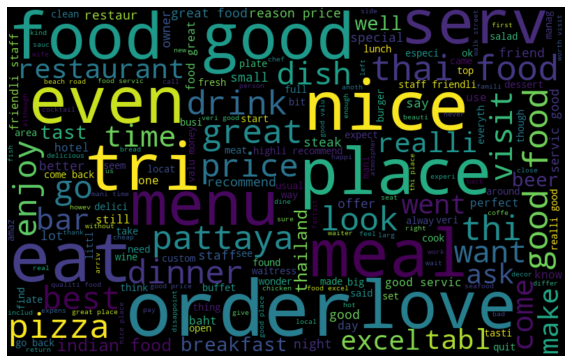

In [23]:
# ALl the stemmed words in reviews 
all_words = ' '.join([text for text in sent_data['Cleaned_Review']])    #stemmed words

from wordcloud import WordCloud
wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(all_words)

plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

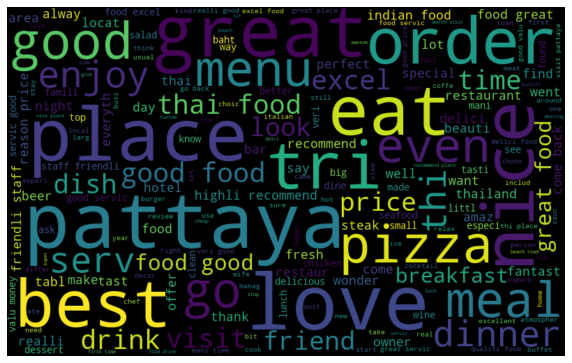

In [24]:
# Words used by the customers in reviews corresponding to rating 5
# Rating the restaurants as excellent
excellent_words = ' '.join([text for text in sent_data['Cleaned_Review'][sent_data['Rating'] == 50]])

wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(excellent_words)
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

# Sentiment Analysis

In [25]:
import nltk
nltk.download('vader_lexicon')
from nltk.sentiment.vader import SentimentIntensityAnalyzer

## Creating sentimental polarity 
analyzer = SentimentIntensityAnalyzer()
def compound_score(txt):
    return analyzer.polarity_scores(txt)["compound"]

## Sentiments
def sentiment(score):
    emotion = ""
    if score >= 0.5:
        emotion = "Positive"
    elif score <= -0.5:
        emotion = "Negative"
    else:
        emotion = "Neutral"
    return emotion

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\attawut\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [26]:
listy = []

for index, row in sent_data.iterrows():
  ss = compound_score(row["Cleaned_Review"])
  listy.append(ss)
  
se = pd.Series(listy)
sent_data['polarity'] = se.values

display(sent_data.head(100))

Review  Rating  \
0   Good taste food nice staff frendly big verity ...      40   
1                                 Not busy new system      50   
2    go counter order meal pay sit bring. Kinda in...      50   
3                                      burgers fries.      50   
4                         Have meal watch world go by      40   
..                                                ...     ...   
95   restaurants Thailand food cooked order patien...      40   
96                                       good service      40   
97                expensive especially size portions.      40   
98  Have traveling pattaya visit family past 8 yea...      50   
99  daily specials amazing cheep great staff great...      50   

             Hotel_Name                                     Cleaned_Review  \
0   18 COINS RESTAURANT  good tast food nice staff frendli big veriti f...   
1   18 COINS RESTAURANT                                not busi new system   
2   18 COINS RESTAURANT  go counter order meal pay sit bring. kinda inf...   
3   18 COINS RESTAURANT                                      burger fries.   
4   18 COINS RESTAURANT                        have meal watch world go by   
..                  ...                                                ...   
95  18 COINS RESTAURANT  restaur thailand food cook order patient. veri...   
96  18 COINS RESTAURANT                                        good servic   
97  18 COINS RESTAURANT                       expens especi size portions.   
98  18 COINS RESTAURANT  have travel pattaya visit famili past 8 year s...   
99  18 COINS RESTAURANT  daili special amaz cheep great staff great loc...   

    polarity  
0     0.8126  
1     0.0000  
2     0.3008  
3     0.0000  
4     0.0000  
..       ...  
95    0.0000  
96    0.4404  
97    0.0000  
98    0.4404  
99    0.8979  

[100 rows x 5 columns]

In [27]:
sent_data

Review  Rating  \
0      Good taste food nice staff frendly big verity ...      40   
1                                    Not busy new system      50   
2       go counter order meal pay sit bring. Kinda in...      50   
3                                         burgers fries.      50   
4                            Have meal watch world go by      40   
...                                                  ...     ...   
79229   along staff. Looking forward development plac...      50   
79230  Happy honoured first reviewer lovely little ve...      50   
79231   already great start. The menu Asian-fusion br...      50   
79232   address listed TripAdvisor correct one. All s...      50   
79233   smiley positive interior cozy (special kudos ...      50   

                           Hotel_Name  \
0                 18 COINS RESTAURANT   
1                 18 COINS RESTAURANT   
2                 18 COINS RESTAURANT   
3                 18 COINS RESTAURANT   
4                 18 COINS RESTAURANT   
...                               ...   
79229  ํYES VEGAN BED AND VEGAN FOODS   
79230  ํYES VEGAN BED AND VEGAN FOODS   
79231  ํYES VEGAN BED AND VEGAN FOODS   
79232  ํYES VEGAN BED AND VEGAN FOODS   
79233  ํYES VEGAN BED AND VEGAN FOODS   

                                          Cleaned_Review  polarity  
0      good tast food nice staff frendli big veriti f...    0.8126  
1                                    not busi new system    0.0000  
2      go counter order meal pay sit bring. kinda inf...    0.3008  
3                                          burger fries.    0.0000  
4                            have meal watch world go by    0.0000  
...                                                  ...       ...  
79229  along staff. look forward develop place new su...    0.5707  
79230  happi honour first review love littl venue. it...    0.8360  
79231  alreadi great start. the menu asian-fus broad ...    0.8625  
79232  address list tripadvisor correct one. all staf...    0.0000  
79233  smiley posit interior cozi (special kudo tap b...    0.6908  

[79234 rows x 5 columns]

In [ ]:
sent_data

In [ ]:
sent_data.to_csv('Trip_advisor_sentiment.csv', encoding='utf-8')